# Decaiment radioactiu

[Descarregar notebook](decaiment_radioactiu.ipynb) 

La radioactivitat és una reacció de desintegració que tenen alguns nuclis atòmics. Es tracta d'un procés aleatori en la que el nucli emet una partícula o radiació. La velocitat de desintegració és proporcional a la quantitat de nuclis radioactis presents en una mostra, això es pot expressar a través de la relació següent:

$$\frac{dN}{dt}=-\lambda N$$

on $N$ és el nombre de nuclis radioactius actuals i la constant de proporcionalitat, $\lambda$, es coneix com **constant de decaiment** o **constant radioactiva** que té unitats de $\mathrm{s^{-1}}$. L'expresió $dN/dt$ és la velocitat de transformació o decaiment. El signe negatiu en l'equació respon al fet de que els nombre de nuclis radioactius presents disminueix.

## Integració numèrica

Partint de l'equació anterior ens plantegem la següent qüestió: si coneixem la quantitat de nuclis radioactius presents en un determinat instant i la seva velocitat de transformació, com podem saber la quantitat de nuclis que quedaran en un instant posterior?

Intentarem resoldre aquest problema de manera numèrica utilitzant el llenguatge Python. Si tenim un nombre de nuclis $N_i$ a l'instant $t_i$, un instant posterior $\Delta t = t_{i+1} - t_i$, el nombre de nuclis hi haurà canviat en 

$$\Delta N = - \lambda \Delta t$$

El nombre total de nuclis en l'instant $t_{i+1}$ serà 

$$N_{i+1} = N_i - \lambda (t_{i+1} - t_i)$$

Aquest procés el podem continuar fins arribar al temps desitjat. 

Implementarem l'algoritme amb un exemple. Considerem una mostra radioactiva de 1000 nuclis que té un període de semidesintegració de 5 dies. Determinarem l'evolució de la quantitat de nuclis radioactius.

In [1]:
from pylab import *

# Determinació de la constant de decaiment
Lambda = log(2)/5

# temps inicial
t0 = 0

# temps final en segons
tf = 40

# delta_t: mida del pas
dt = 1
dades = int(ceil(tf-t0)/dt)   # 

t = linspace(t0,tf,dades)     # array dels temps
N = zeros(len(t))             # array del nombre de nuclis
N[0] = 10000                  # Nombre inicial de nuclis

for i in range(0,len(t)-1):
    N[i+1] = N[i] - Lambda * N[i] * (t[i+1] - t[i])

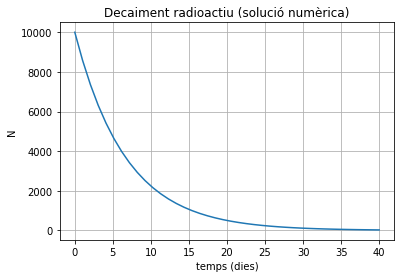

In [2]:
title("Decaiment radioactiu (solució numèrica)")
xlabel("temps (dies)")
ylabel("N")
grid(True)
plot(t, N)


## Solució analítica

La llei de decaiment radiactiu ve donada per l'equació diferencial ja plantejada:

$$\frac{dN}{dt}=-\lambda N$$

que té una solució analítica. Podem integrar l'expresió anterior,

$$\int_{N_0}^{N}\frac{dN}{N}=-\lambda\int_{0}^{t}dt$$

$$\ln\bigg(\frac{N}{N_0}\bigg)=-\lambda t$$

i, finalment,

$$N = N_0 e^{-\lambda t}$$

Per tant, tenim en l'expresió anterior la solució analítica de la equació diferencial anterior. Ara ens resulta possible trobar la solució exacta per a després poder comparar-la amb la solució numèrica que havíem trobat abans.

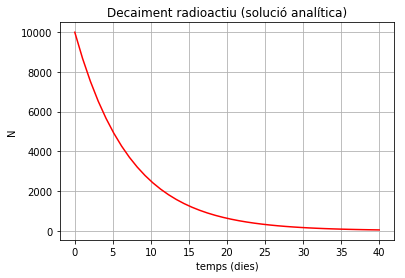

In [3]:
N_a = N[0] * exp(-Lambda * t)      # Solució analítica

title("Decaiment radioactiu (solució analítica)")
xlabel("temps (dies)")
ylabel("N")
grid(True)
plot(t,N_a, 'r')

Podem comprovar que les dues solucions són coincidents si fem les dues gràfiques juntes.

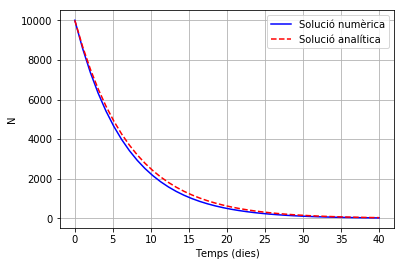

In [4]:
xlabel("Temps (dies)")
ylabel("N")
grid(True)
plot(t,N,'b-',label=r'Solució numèrica')
plot(t,N_a,'r--',label=r'Solució analítica')
legend(loc="upper right")

Observem com la solució numèrica i analítica no són exactament coincidents, això ho podem millorar si millorem la precisió. Per aconseguir-ho cal prendre un pas de temps més petit.

## Exercici

En els càlculs pel mètode numèric hem adoptat un pas de temps d'1 dia. Millora la precisió adoptant un pas més petit, con ser t = 0.1 i comprova que la gràfica numèrica s'acosta a la gràfica analítica.